In [1]:
!pip install numpy pandas matplotlib opencv-python pillow tensorflow keras scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
print(tf. __version__)

2.18.0


In [5]:
dataset_path = "C:/Users/LENOVO/Downloads/archive/Potato"

Number of images found: 1500


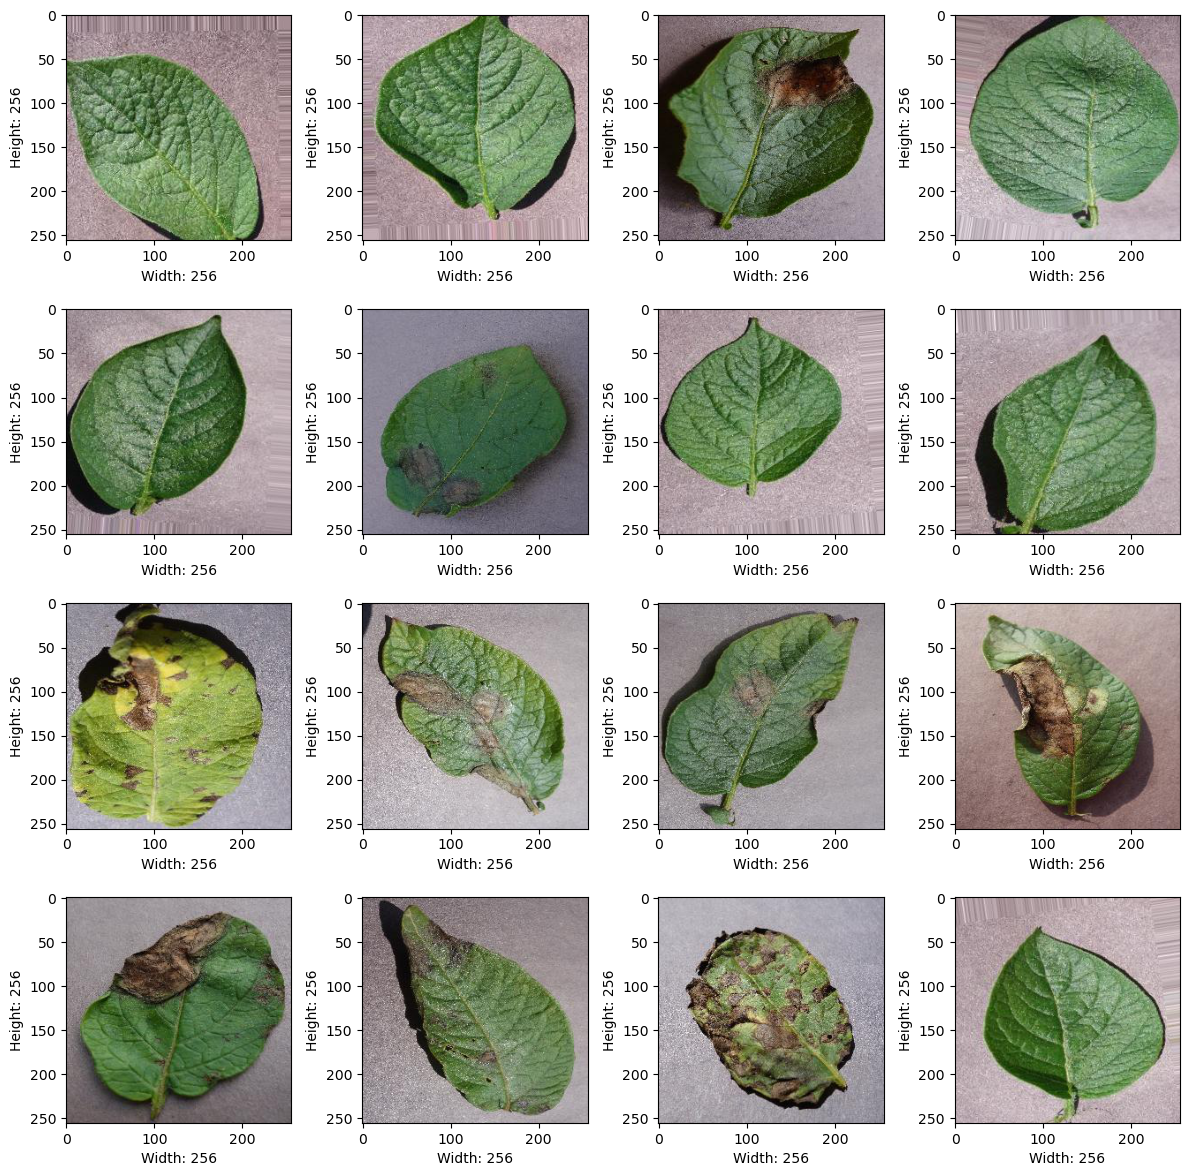

In [10]:
# Set the correct dataset path (use raw string to avoid escape issues)
dataset_path = r"C:\Users\LENOVO\Downloads\archive\Potato"  # Ensure correct path

# Function to get all image files recursively from subdirectories
def get_image_files(directory):
    image_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg', '.tiff', '.bmp')):
                image_files.append(os.path.join(subdir, file))
    return image_files

# Get the list of all image files in the dataset directory (including subdirectories)
image_files = get_image_files(dataset_path)

# Check if there are any images found
num_images = len(image_files)
print(f"Number of images found: {num_images}")

# If there are fewer than 16 images, select all of them
num_to_select = min(num_images, 16)
random_images = random.sample(image_files, num_to_select)

# Plotting images to check dataset
plt.figure(figsize=(12, 12))

for i in range(num_to_select):
    plt.subplot(4, 4, i+1)  # 4x4 grid for 16 images (or less)
    img_path = random_images[i]
    rand_img = imread(img_path)
    
    # Plot the image
    plt.imshow(rand_img)
    plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=10)  # Image width
    plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=10)  # Image height
    plt.tight_layout()

# Display the images
plt.show()


In [11]:
# Function to convert an image to a NumPy array and resize it
def convert_image_to_array(image_dir):
    try:
        # Read the image
        image = cv2.imread(image_dir)
        
        if image is not None:
            # Resize the image to 256x256
            image = cv2.resize(image, (256, 256))
            
            # Convert the image to an array
            image_array = img_to_array(image)
            
            # Normalize the pixel values (to 0-1 range)
            image_array = image_array / 255.0
            
            return image_array
        else:
            print(f"Error: {image_dir} is not a valid image.")
            return np.array([])  # Return an empty array for invalid images
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get all image files (using the previously defined method)
image_files = get_image_files(dataset_path)

# Convert each image to an array and store them in a list
image_arrays = []
for image_file in image_files:
    img_array = convert_image_to_array(image_file)
    if img_array is not None and img_array.size > 0:
        image_arrays.append(img_array)

# Convert the list of image arrays into a NumPy array
image_data = np.array(image_arrays)

# Check the shape of the resulting array
print(f"Shape of image data: {image_data.shape}")

Shape of image data: (1500, 256, 256, 3)


In [13]:
dataset_path = r"C:\Users\LENOVO\Downloads\archive\Potato"
labels = os.listdir(dataset_path)

print(labels)

['Test', 'Train', 'Valid']


In [14]:
# Path to your dataset
dataset_path = r"C:\Users\LENOVO\Downloads\archive\Potato"
root_dir = listdir(dataset_path)

# Assuming your folders are organized as:
# 'Train' -> Contains subfolders for each class of potato diseases
# 'Test' -> Same structure as 'Train'
# 'Valid' -> Same structure as 'Train'

image_list, label_list = [], []

# Function to convert image to numpy array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))  # Resize image to 256x256
            return img_to_array(image)  # Convert to numpy array
        else:
            return np.array([])  # If image is None, return empty array
    except Exception as e:
        print(f"Error reading image {image_dir}: {e}")
        return np.array([])  # Return empty array in case of an error

# Iterate through the root directory, assuming 'Train', 'Valid', 'Test' are present
for directory in root_dir:
    # Check if it's one of the dataset folders (Train, Test, Valid)
    if directory in ['Train', 'Valid', 'Test']:
        print(f"Processing {directory} dataset...")

        # List all the classes in the current folder (e.g., Healthy, Early_blight)
        plant_image_list = listdir(f"{dataset_path}/{directory}")
        
        for plant_class in plant_image_list:
            # Get all the images for this class
            image_files = listdir(f"{dataset_path}/{directory}/{plant_class}")
            
            for image_file in image_files:
                image_path = f"{dataset_path}/{directory}/{plant_class}/{image_file}"
                
                # Convert image to array and append it
                image_array = convert_image_to_array(image_path)
                if image_array.size != 0:  # Only append non-empty images
                    image_list.append(image_array)
                    
                    # Map class name to label (if you have a list of class names, map them to binary labels)
                    label_list.append(plant_class)  # You can replace with a numeric label if necessary

# Convert lists to numpy arrays
image_list = np.array(image_list)
label_list = np.array(label_list)

# Print some statistics about the dataset
print(f"Number of images: {len(image_list)}")
print(f"Number of labels: {len(label_list)}")
print(f"Labels: {np.unique(label_list)}")


Processing Test dataset...
Processing Train dataset...
Processing Valid dataset...
Number of images: 1500
Number of labels: 1500
Labels: ['Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']


Class Distribution:
 Potato___Early_blight    500
Potato___healthy         500
Potato___Late_blight     500
Name: count, dtype: int64


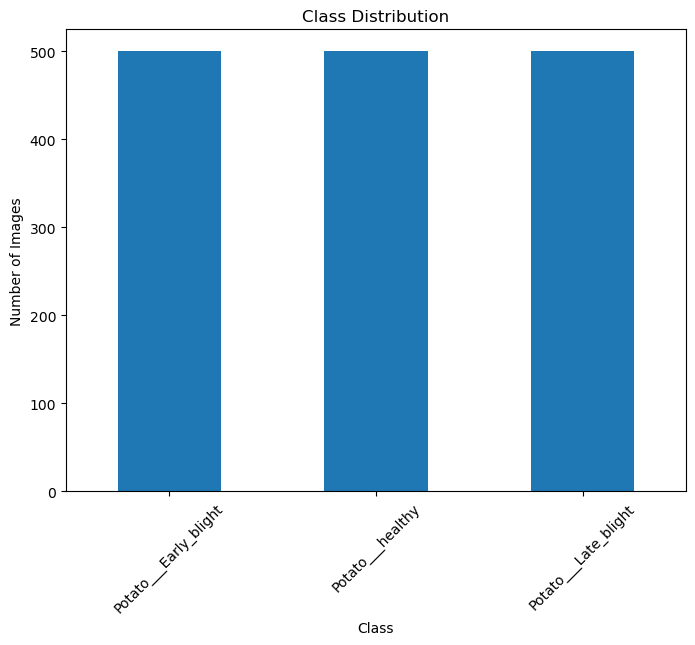

In [15]:
# Use the original label_list to visualize the class distribution
label_counts = pd.Series(label_list).value_counts()

# Print the class distribution
print("Class Distribution:\n", label_counts)

# Visualizing the class distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Checking the shape of the first image in the list (just for confirmation)
print("Shape of the first image:", image_list[0].shape)

# Checking the total number of images (length of label_list)
print("Total number of images:", len(label_list))

# Checking the shape of label_list (should match the number of images)
print("Shape of label list:", label_list.shape)


Shape of the first image: (256, 256, 3)
Total number of images: 1500
Shape of label list: (1500,)


In [17]:
# Splitting the dataset into train, test, and validation sets
x_train, x_temp, y_train, y_temp = train_test_split(image_list, label_list, test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=10)

In [18]:
# Normalizing the dataset
x_train = np.array(x_train, dtype=np.float32) / 255.0
x_test = np.array(x_test, dtype=np.float32) / 255.0
x_val = np.array(x_val, dtype=np.float32) / 255.0

# Reshaping the images to fit the input dimensions of the model (256x256 with 3 color channels)
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)
x_val = x_val.reshape(-1, 256, 256, 3)

In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the original labels and transform them to integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)  # Ensure you have validation labels, otherwise skip this line.

# Perform one-hot encoding on the integer labels
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)


In [25]:
# Creating the model architecture
model = Sequential()

# First Convolutional Layer (input shape is specified here directly)
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output from convolutional layers
model.add(Flatten())

# Fully connected layer (Dense layer)
model.add(Dense(128, activation="relu"))

# Output layer with softmax for multi-class classification
model.add(Dense(3, activation="softmax"))

# Model Summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,450,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,470,595 (55.20 MB)

 Trainable params: 14,470,595 (55.20 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

In [27]:
# Splitting the training dataset into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [28]:
# Training the model
epochs = 50  # Number of training epochs
batch_size = 32  # Batch size (you can adjust this)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 964ms/step - accuracy: 0.4121 - loss: 1.3431 - val_accuracy: 0.5125 - val_loss: 0.8675
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 955ms/step - accuracy: 0.6537 - loss: 0.7848 - val_accuracy: 0.6417 - val_loss: 0.6460
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 924ms/step - accuracy: 0.7899 - loss: 0.5953 - val_accuracy: 0.8042 - val_loss: 0.4799
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 897ms/step - accuracy: 0.8456 - loss: 0.4487 - val_accuracy: 0.8583 - val_loss: 0.3875
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 874ms/step - accuracy: 0.9045 - loss: 0.3345 - val_accuracy: 0.9083 - val_loss: 0.2968
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 873ms/step - accuracy: 0.9216 - loss: 0.2563 - val_accuracy: 0.9000 - val_loss: 0.2507
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 880ms/step - accuracy: 0.9403 - loss: 0.2225 - val_accuracy: 0.9292 - val_loss: 0.2150
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 878ms/step - accuracy: 0.9349 - loss: 0.1855 - val_accu

In [31]:
# Saving the trained model
model.save(r"C:\Users\LENOVO\Downloads\archive\Model2\plant_disease_model.h5")

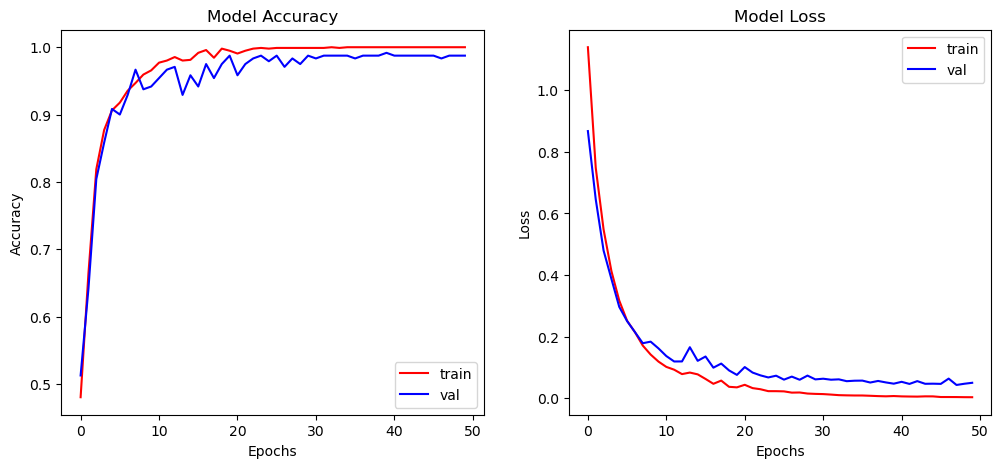

In [32]:
# Plot the training history
plt.figure(figsize = (12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color = 'r', label='train')
plt.plot(history.history['val_accuracy'], color = 'b', label='val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color = 'r', label='train')
plt.plot(history.history['val_loss'], color = 'b', label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [33]:
print("Calculating model accuracy")

# Evaluating the model on the test set
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}%")


Calculating model accuracy
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9633 - loss: 0.0964
Test Accuracy: 97.33333587646484%


In [34]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# You can compare y_pred_labels with y_test (true labels) to evaluate the model
print("Predicted labels:", y_pred_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
Predicted labels: [0 0 0 0 2 2 0 2 2 2 0 0 2 0 0 1 0 1 2 2 0 2 1 1 0 1 0 0 1 0 0 0 2 2 2 0 1
 2 2 2 1 0 0 2 2 2 2 2 2 0 0 0 2 1 2 1 2 0 1 2 2 2 0 1 0 2 1 2 1 2 0 1 0 2
 2 1 1 2 0 2 1 0 1 1 2 1 2 2 2 0 1 2 2 2 1 0 0 1 1 1 1 0 0 1 0 1 2 2 0 1 0
 2 2 2 1 1 2 2 1 0 0 2 0 0 2 1 0 1 1 1 2 0 0 0 2 0 2 0 2 1 0 0 1 2 2 0 2 0
 0 1]


In [35]:
# Plotting image to compare
img = array_to_img(x_test[11])
img.show()


In [37]:
# Define your class labels (make sure to replace with your actual labels)
all_labels = ['healthy', 'diseased', 'infected']  # Replace with your actual class labels

# Finding max value from prediction list and comparing original value vs predicted
print("Originally: ", all_labels[np.argmax(y_test[11])])
print("Predicted: ", all_labels[np.argmax(y_pred[11])])


Originally:  healthy
Predicted:  healthy


In [38]:
# Looping through the first 50 images and displaying their original vs predicted labels
for i in range(50):
    print(all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred[i])])


healthy   healthy
healthy   healthy
healthy   healthy
healthy   healthy
infected   infected
diseased   infected
healthy   healthy
infected   infected
infected   infected
infected   infected
healthy   healthy
healthy   healthy
infected   infected
healthy   healthy
healthy   healthy
diseased   diseased
healthy   healthy
diseased   diseased
infected   infected
infected   infected
healthy   healthy
infected   infected
diseased   diseased
diseased   diseased
healthy   healthy
diseased   diseased
healthy   healthy
healthy   healthy
diseased   diseased
healthy   healthy
healthy   healthy
healthy   healthy
infected   infected
infected   infected
infected   infected
healthy   healthy
diseased   diseased
infected   infected
infected   infected
infected   infected
diseased   diseased
healthy   healthy
diseased   healthy
infected   infected
infected   infected
infected   infected
infected   infected
infected   infected
infected   infected
healthy   healthy
